In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV,cross_val_predict

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.getcwd()
os.chdir("/home/nakul76/python_code/ml/datasets/loan dataset/")

traindata = pd.read_csv('train.csv')
testdata = pd.read_csv("test.csv")

In [4]:
print(traindata.head(5))

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [5]:
traindata.drop(columns=['Loan_ID'],axis=1,inplace=True)
traindata.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
print(traindata.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
None 



In [8]:
print(traindata.describe(),'\n')

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000   



In [9]:
print(traindata.shape,'\n')

(614, 12) 



In [10]:
print(traindata.columns,'\n')

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object') 



In [11]:
#for printing the datatypes of each feature
print(traindata.dtypes)
print()
#to show description of even values which arent numeric
print(traindata.describe(include=["object", "bool"]))
print()

#to show the value counts of each feature
print(traindata['Married'].value_counts(normalize=True))
print()
#to sort the entire data frame based on one feature
print(traindata.sort_values(by='LoanAmount', ascending=True).head(20))
print()
#to sort dataframe on basis of multiple columns 
traindata.sort_values(by=["ApplicantIncome","LoanAmount",], ascending=[True, True]).head(10)

#since credit history is also categorical therefore we will read it as object variable rather than integer variable
traindata['Credit_History']=traindata['Credit_History'].astype('O')

#to check for any na value present 
print(traindata['Credit_History'].isna().value_counts())
print()
print(traindata['Credit_History'].isna().any())
print()

#check if any null/na values are present in the feature
print(traindata['Loan_Status'].isnull().any())
print()
# sort the values by the total null values present
print(traindata.isna().sum().sort_values(ascending = True))
print()

# same thing but in a loop
cols = traindata.columns
for col in cols:
    print(f"the column: {col} has datatyp: {traindata[col].dtypes} and null values: {traindata[col].isna().any()} ")

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

       Gender Married Dependents Education Self_Employed Property_Area  \
count     601     611        599       614           582           614   
unique      2       2          4         2             2             3   
top      Male     Yes          0  Graduate            No     Semiurban   
freq      489     398        345       480           500           233   

       Loan_Status  
count          614  
unique           2  
top              Y  
freq           422  

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
568  Female      N

In [12]:
cols = traindata.columns
for col in cols:
    print(traindata[col].dtype)
    print(traindata[col].value_counts())
    print()

object
Male      489
Female    112
Name: Gender, dtype: int64

object
Yes    398
No     213
Name: Married, dtype: int64

object
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

object
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

object
No     500
Yes     82
Name: Self_Employed, dtype: int64

int64
2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64

float64
0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

float64
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

float64
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0  

In [13]:
#separating columns as to whether they are categorical or numerical values

cols = traindata.columns
cat_col = []
num_col = []
for col in cols:
    if(traindata[col].dtype == 'object' or col == 'Credit_History'):
        cat_col.append(col)
    else:
        num_col.append(col)

print(cat_col)
print(num_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


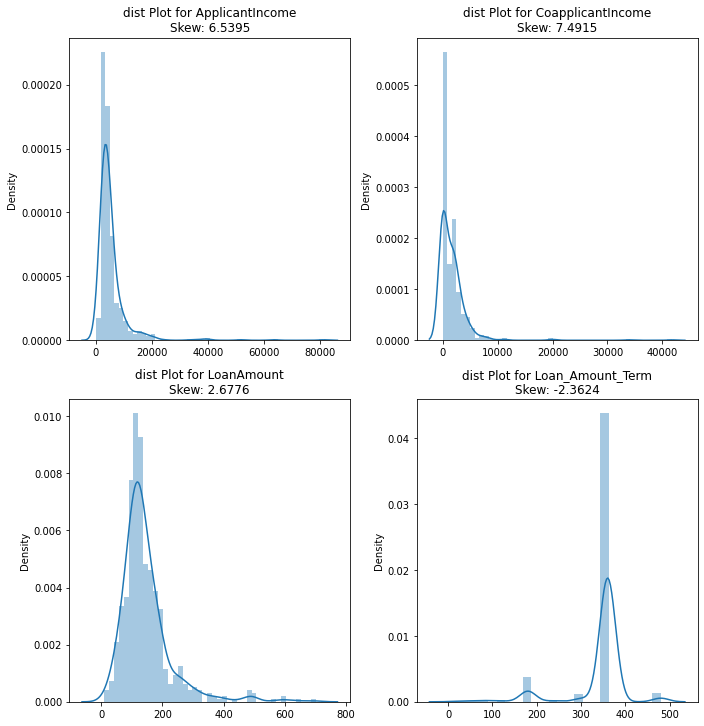

In [15]:
#plotting distribution plot for all the numeric columns

plt.figure(figsize = (10,20))
index=1
for col in num_col:
    plt.subplot(4,2,index)
    plt.tight_layout()
    sns.distplot(x= traindata[col])
    plt.title(f"dist Plot for {col}\nSkew: {round(traindata[col].skew(),4)}")
    index+=1

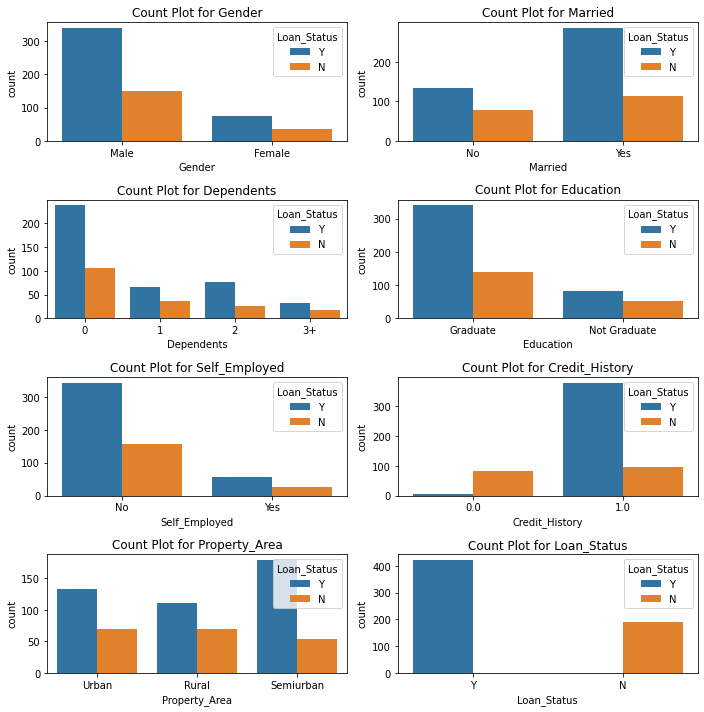

In [16]:
#count plot for all the categorical plots

plt.figure(figsize = (10,10))
index=1
for col in cat_col:
    plt.subplot(4,2,index)
    plt.tight_layout()
    sns.countplot(x= col,hue= 'Loan_Status',data= traindata)
    plt.title(f"Count Plot for {col}")
    index+=1

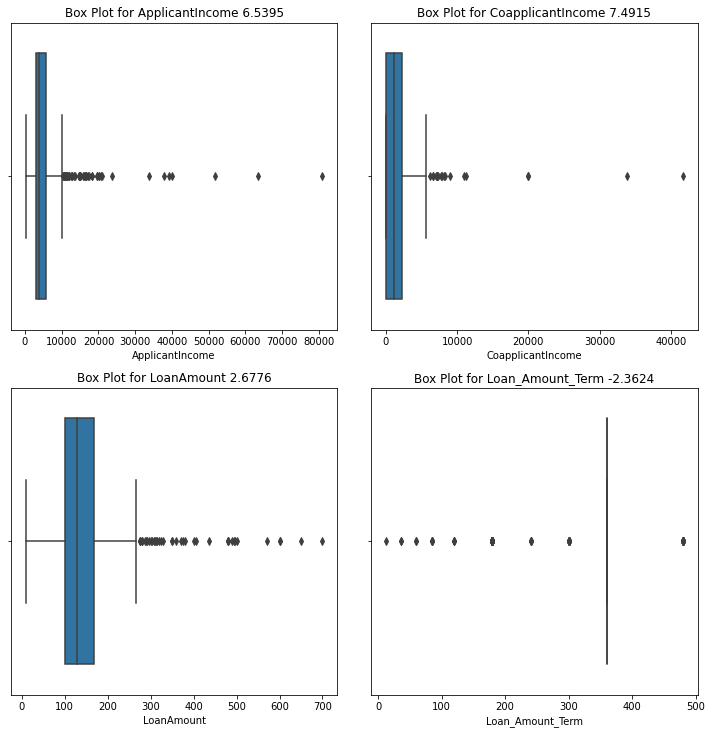

In [17]:
#box plot for all the numeric plots

plt.figure(figsize = (10,20))
index=1
for col in num_col:
    plt.subplot(4,2,index)
    plt.tight_layout()
    sns.boxplot(x= traindata[col],)
    plt.title(f"Box Plot for {col} {round(traindata[col].skew(),4)}")
    index+=1

In [18]:
#taking all the numeric features
num_data = traindata.loc[:,num_col]
num_data.head(5)

#checking if there are any missing values
print(num_data.isna().any())
print()

#using simpleImputer to fill the missing values
simp = SimpleImputer(missing_values=np.nan,strategy='median')
num_data = pd.DataFrame(simp.fit_transform(num_data),columns=num_col)

#checking if there are any missing values
print(num_data.isna().any())
print(num_data.shape)

ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
dtype: bool

ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
dtype: bool
(614, 4)


In [19]:
#counting the number of  outliers in a column and then removing those outliers


#creating a copy of the original data

orgdata  = num_data.copy()

def count_outliers(col):
    
    q1= np.quantile(num_data[col],.25)
    q3 =np.quantile(num_data[col],.75)
    iqr = q3-q1
    thres = 1.5
    buffer = iqr*thres
    lower_cut = q1-buffer
    upper_cut = q3+buffer
    print(lower_cut)
    print(upper_cut)
    outs = [x for x in num_data[col].values if x>upper_cut or x<lower_cut]
    num_data.drop(num_data[(num_data[col]>upper_cut) | (num_data[col]<lower_cut)].index,inplace=True)
    return outs,len(outs)

total =0  
for col in num_col:
    
    if (col !='Loan_Amount_Term'):
        print(col)
        outs,num = count_outliers(col)
        total+=num
        print(num)
        print()
print(total)

# scaling the data 
mm = MinMaxScaler()
num_data = pd.DataFrame(mm.fit_transform(num_data),columns= num_col)

ApplicantIncome
-1498.75
10171.25
50

CoapplicantIncome
-3505.5
5842.5
16

LoanAmount
17.5
237.5
28

94


In [20]:
print(num_data.shape)
print(num_data.isna().any())


(520, 4)
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
dtype: bool


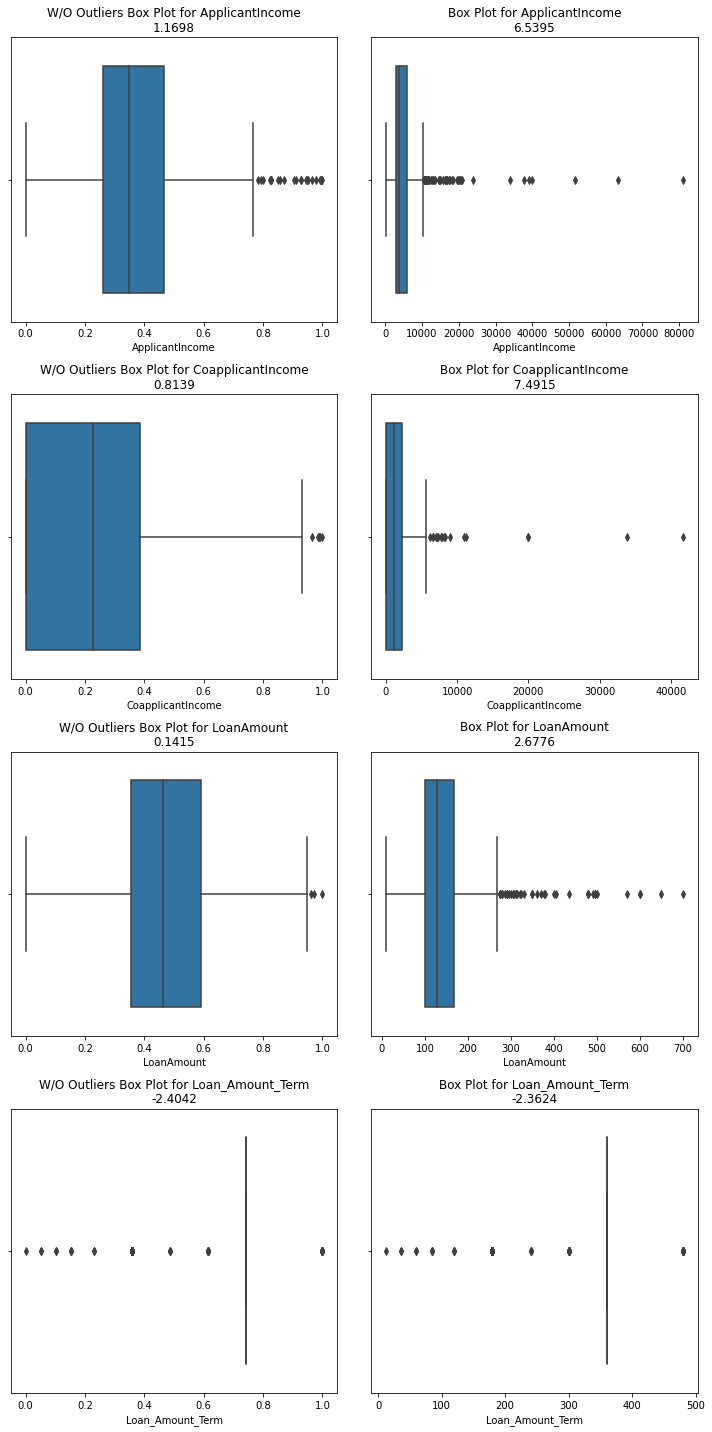

In [21]:
#box plot after and before removing the outliers

plt.figure(figsize = (10,20))
index=1
for col in num_col:
    plt.subplot(4,2,index)
    plt.tight_layout()
    sns.boxplot(x= num_data[col],)
    plt.title(f"W/O Outliers Box Plot for {col}\n{round(num_data[col].skew(),4)}")
    index+=1
    
    plt.subplot(4,2,index)
    plt.tight_layout()
    sns.boxplot(x= traindata[col],)
    plt.title(f"Box Plot for {col}\n{round(traindata[col].skew(),4)}")
    index+=1    

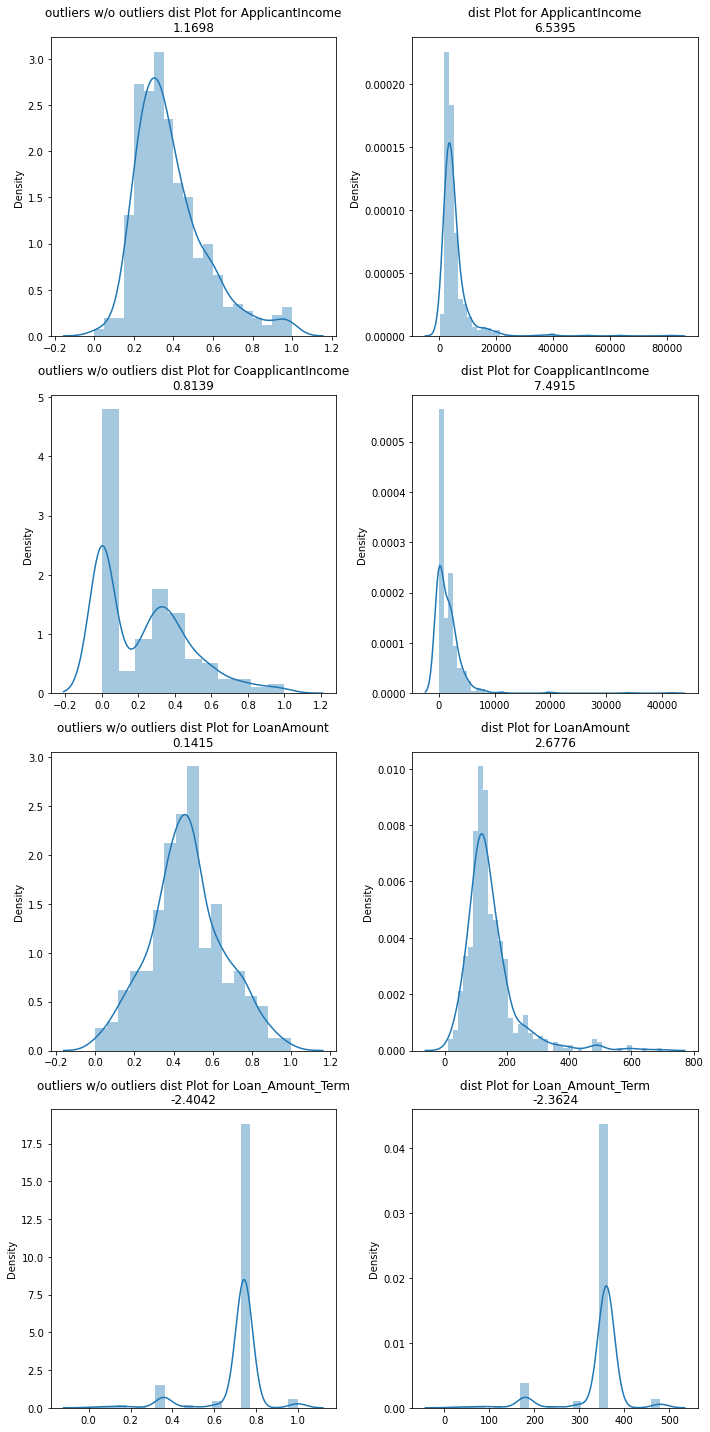

In [22]:
#distribution plot for before and after removing the outliers

plt.figure(figsize = (10,20))
index=1
for col in num_col:
    plt.subplot(4,2,index)
    plt.tight_layout()
    sns.distplot(x= num_data[col])
    plt.title(f"outliers w/o outliers dist Plot for {col}\n{round(num_data[col].skew(),4)}")
    index+=1
    
    plt.subplot(4,2,index)
    plt.tight_layout()
    sns.distplot(x= traindata[col])
    plt.title(f"dist Plot for {col}\n{round(traindata[col].skew(),4)}")
    index+=1    

In [23]:
#index of all the rows  which arent outliers 
indexes = num_data.index

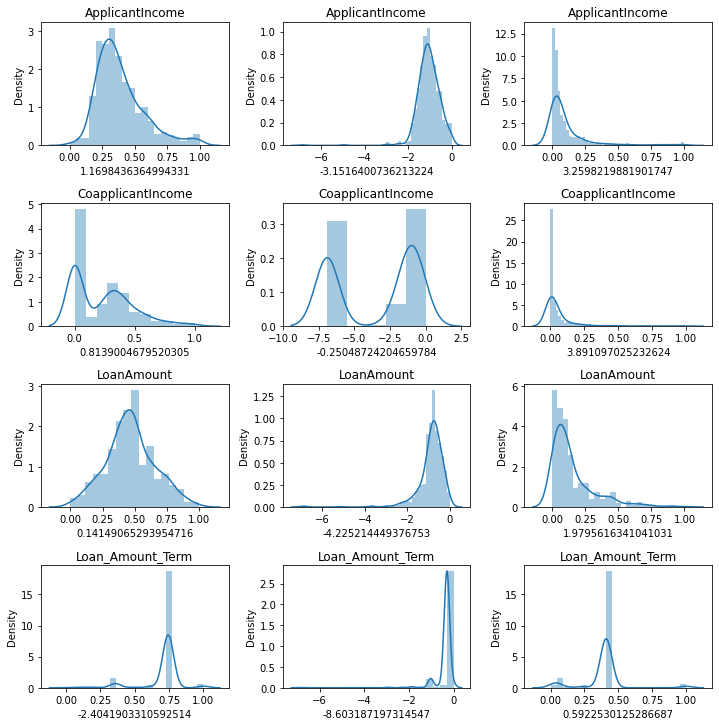

In [24]:
#plotting the transformation 

index=1

plt.figure(figsize =(10,10))
for col in num_col:
    
    plt.subplot(4,3,index)
    plt.tight_layout()
    data= num_data[col]
    sns.distplot(data)
    plt.title(col)
    plt.xlabel(f"{data.skew()}")
    index+=1
    
    plt.subplot(4,3,index)
    logdata = np.log(data+0.001)
    sns.distplot(logdata)
    plt.title(col)
    plt.xlabel(f"{logdata.skew()}")
    index+=1
    
    plt.subplot(4,3,index)
    sqdata = np.power(data,3)
    sns.distplot(sqdata)
    plt.title(f"{col}")
    plt.xlabel(f"{sqdata.skew()}")
    index+=1

In [25]:
for col in num_col:
    print(num_data[col].skew())

1.1698436364994331
0.8139004679520305
0.14149065293954716
-2.4041903310592514


In [24]:
#since the skew of the features is pretty low after removing the outliers there is no need to perform any transformation

# for col in num_col:
#     print(col)
#     data = num_data[col]
#     if(data.skew()>0):
#         print(data.skew())
#         data = np.log(data+0.1)
#         print(data.skew())
#     else:
#         print(data.skew())
#         data = np.power(data,3)
#         print(data.skew())
#     num_data[col]=data 
#     print(col,data.isna().any())
#     print()

In [27]:
#taking all categorical feautures
cat_data = traindata.loc[:,cat_col]
cat_data.head(5)

#checking if there is any na value present
print(cat_data.isna().any())
print()

#filling the missing values using simpleImputer
simp =  SimpleImputer(missing_values=np.nan,strategy="most_frequent")
cat_data = pd.DataFrame(simp.fit_transform(cat_data),columns=cat_data.columns)

#checking for missing values
print(cat_data.isna().any())


#Label Encoding 
le = LabelEncoder()
for col in cat_col:
    print(cat_data[col].value_counts())
    print("********")
    cat_data[col] = le.fit_transform(cat_data[col])
    print(cat_data[col].value_counts())
    print()

#dropping all the rows where the values were outliers inthe numerical data
cat_data =cat_data.iloc[indexes,:]
print(cat_data.shape)

Gender             True
Married            True
Dependents         True
Education         False
Self_Employed      True
Credit_History     True
Property_Area     False
Loan_Status       False
dtype: bool

Gender            False
Married           False
Dependents        False
Education         False
Self_Employed     False
Credit_History    False
Property_Area     False
Loan_Status       False
dtype: bool
Male      502
Female    112
Name: Gender, dtype: int64
********
1    502
0    112
Name: Gender, dtype: int64

Yes    401
No     213
Name: Married, dtype: int64
********
1    401
0    213
Name: Married, dtype: int64

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
********
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64
********
0    480
1    134
Name: Education, dtype: int64

No     532
Yes     82
Name: Self_Employed, dtype: int64
********
0    532
1     82
Name: Self_Emplo

In [39]:
cat_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1,2,1
1,1,1,1,0,0,1,0,0
2,1,1,0,0,1,1,2,1
3,1,1,0,1,0,1,2,1
4,1,0,0,0,0,1,2,1
5,1,1,2,0,1,1,2,1
6,1,1,0,1,0,1,2,1
7,1,1,3,0,0,0,1,0
8,1,1,2,0,0,1,2,1
9,1,1,1,0,0,1,1,0


In [40]:
#concat the numeric as well as categorical data
data  = pd.concat([num_data,cat_data],axis=1)
print(data.shape)
print(data.head(10))

print(data.isna().any())

(520, 12)
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Gender  \
0         0.575831           0.000000    0.488152           0.74359       1   
1         0.447914           0.264515    0.488152           0.74359       1   
2         0.287966           0.000000    0.194313           0.74359       1   
3         0.245832           0.413612    0.450237           0.74359       1   
4         0.591088           0.000000    0.549763           0.74359       1   
5         0.220572           0.265918    0.331754           0.74359       1   
6         0.291604           0.439221    0.630332           0.74359       1   
7         0.389613           0.267672    0.677725           0.74359       1   
8         0.308174           0.122785    0.213270           0.74359       1   
9         0.237446           0.322750    0.398104           0.74359       1   

   Married  Dependents  Education  Self_Employed  Credit_History  \
0        0           0          0              0    

<AxesSubplot:>

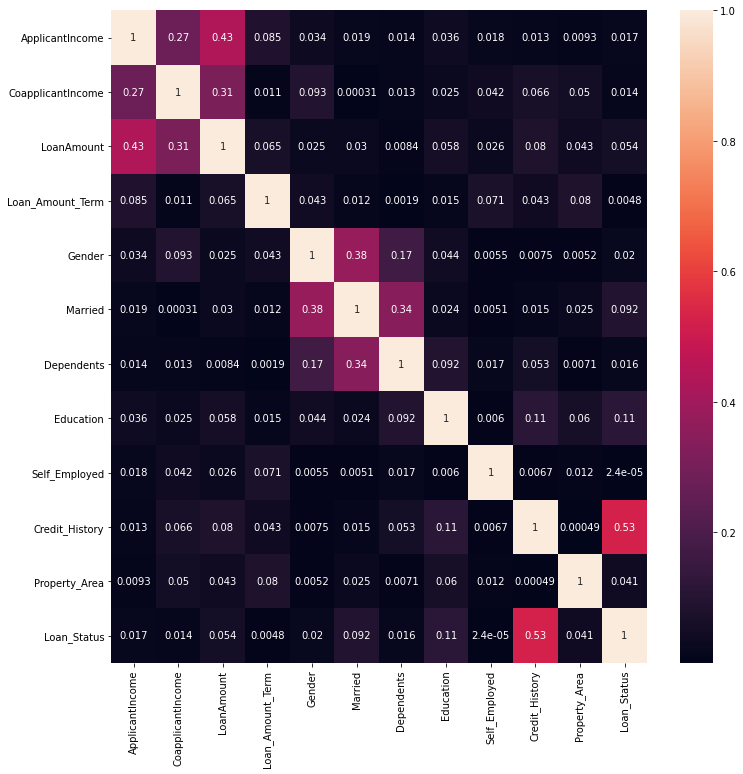

In [41]:
corr = data.corr()
plt.figure(figsize= (12,12))
sns.heatmap(corr.abs(),annot=True)

In [42]:
#counting the  output values 
data['Loan_Status'].value_counts()

1    357
0    163
Name: Loan_Status, dtype: int64

In [43]:
#since the number of postive values is way more than the number of negative values 

pve  = data[data['Loan_Status']==1]
nve  = data[data['Loan_Status']==0]

print(pve.shape)
print(nve.shape)

(357, 12)
(163, 12)


In [44]:
#therefore we will resample the data and put equal number of values for both postive and negative values

pve = pve.sample(n=163,random_state=10)
print(pve.shape)
print(pve['Loan_Status'].value_counts())

#concat the pve and nve sample and then reshuffle them all together
data = pd.concat([pve,nve])
data = data.sample(frac=1,random_state=12)
print(data.shape)
print(data['Loan_Status'].value_counts())



(163, 12)
1    163
Name: Loan_Status, dtype: int64
(326, 12)
0    163
1    163
Name: Loan_Status, dtype: int64


In [45]:
#just to check if the sample is shuffled properly 

data['Loan_Status'].head(10)

416    0
65     0
493    1
117    1
138    0
144    1
155    1
429    1
378    0
474    1
Name: Loan_Status, dtype: int64

In [46]:
#dividing data into x and y variables
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

print(x.shape)
print(y.shape)

(326, 11)
(326,)


In [47]:
#splitting the dataset in train and test and using Y as stratify 

xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.2,shuffle=True,stratify=y)

In [48]:
print(f"{xtr.shape}\n{xte.shape}")
print(f"{ytr.shape}\n{yte.shape}")

(260, 11)
(66, 11)
(260,)
(66,)


In [49]:
#scoring metric used in gridSearch as well as cross val score

from sklearn.metrics import SCORERS

sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [50]:
#performing 5 split k fold stratified cross val and evaluating our model on basis of precision

cv = StratifiedKFold(5,shuffle=True,)
scoring = 'precision'

In [51]:
#using gridSearch for getting the best hyperparameter values

#gridSearchCV for Logistic Regression 

lr = LogisticRegression()
param= {'C':[0.001,0.01,0.1,1],'penalty':["l1","l2"]}

lrg = GridSearchCV(lr,cv=cv,param_grid = param,verbose=1,scoring=scoring)
lrg.fit(xtr,ytr)

print(lrg.best_score_)
print(lrg.best_params_)
# lr = lrg.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.6501673037306945
{'C': 0.001, 'penalty': 'l2'}


In [52]:
#gridSearchCV for Decision Tree  

dtc = DecisionTreeClassifier()
param= {'criterion':["gini", 'entropy'],'max_features':["auto", 'sqrt', 'log2','None']}

dtg = GridSearchCV(dtc,cv=cv,param_grid = param,verbose=1,scoring=scoring)
dtg.fit(xtr,ytr)

print(dtg.best_score_)
print(dtg.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.6560027678468459
{'criterion': 'entropy', 'max_features': 'sqrt'}


In [53]:
#gridSearchCV for SVM

svc = SVC()
# svc.get_params()
param= {'C':[0.1,1,10],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

svg = GridSearchCV(svc,cv=cv,param_grid = param,verbose=1,scoring=scoring)
svg.fit(xtr,ytr)

print(svg.best_score_)
print(svg.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.655462587333784
{'C': 1, 'kernel': 'poly'}


In [54]:
#gridSearchCV for RF

rfc  = RandomForestClassifier()
# rfc.get_params()
param= {'n_estimators':[50,100,200],'criterion':['entropy', 'gini'],'max_features':["auto",'sqrt', 'log2','None']}

rfg = GridSearchCV(rfc,cv=cv,param_grid = param,verbose=1,scoring=scoring,n_jobs =-1)
rfg.fit(xtr,ytr)

print(rfg.best_score_)
print(rfg.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.6913300492610837
{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}


In [55]:
#gridSearchCV for GB

gbc  = GradientBoostingClassifier()
gbc.get_params()
param= {'learning_rate':[0.01,0.1,0.5],'criterion':['friedman_mse', 'mse', 'mae'],'max_features':["auto",'sqrt', 'log2','None']}

gbg = GridSearchCV(gbc,cv=cv,param_grid = param,verbose=1,scoring=scoring,n_jobs=-1)
gbg.fit(xtr,ytr)

print(gbg.best_score_)
print(gbg.best_params_)
print(gbg)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0.6977330176929732
{'criterion': 'friedman_mse', 'learning_rate': 0.5, 'max_features': 'auto'}
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'max_features': ['auto', 'sqrt', 'log2', 'None']},
             scoring='precision', verbose=1)


In [60]:
#print the performance of all the models with different metrics 

models={
'lr':lrg.best_estimator_,
'dtc' :dtg.best_estimator_,
'svc' :svg.best_estimator_,
'rfc' :rfg.best_estimator_,
'gbc' :gbg.best_estimator_
}

models_performance={}
metrics = ['roc_auc','f1','recall','precision','accuracy']

for metric in metrics:
    for key in models.keys():
        if(key not in models_performance.keys()):
            models_performance[key] ={}
        score = round(cross_val_score(models[key],xtr,ytr,cv=cv,scoring=metric).mean(),4)
        models_performance[key][metric]= score
        print(f"{key}:{metric}:{score}")
    print()

lr:roc_auc:0.7077
dtc:roc_auc:0.6423
svc:roc_auc:0.7506
rfc:roc_auc:0.7672
gbc:roc_auc:0.7565

lr:f1:0.6609
dtc:f1:0.63
svc:f1:0.7086
rfc:f1:0.7015
gbc:f1:0.6722

lr:recall:0.7769
dtc:recall:0.5923
svc:recall:0.8231
rfc:recall:0.7
gbc:recall:0.7231

lr:precision:0.654
dtc:precision:0.6233
svc:precision:0.6465
rfc:precision:0.6799
gbc:precision:0.6649

lr:accuracy:0.6615
dtc:accuracy:0.6115
svc:accuracy:0.6962
rfc:accuracy:0.6846
gbc:accuracy:0.6654



In [62]:
for key in models_performance.keys():
    print(key,models_performance[key])

lr {'roc_auc': 0.7077, 'f1': 0.6609, 'recall': 0.7769, 'precision': 0.654, 'accuracy': 0.6615}
dtc {'roc_auc': 0.6423, 'f1': 0.63, 'recall': 0.5923, 'precision': 0.6233, 'accuracy': 0.6115}
svc {'roc_auc': 0.7506, 'f1': 0.7086, 'recall': 0.8231, 'precision': 0.6465, 'accuracy': 0.6962}
rfc {'roc_auc': 0.7672, 'f1': 0.7015, 'recall': 0.7, 'precision': 0.6799, 'accuracy': 0.6846}
gbc {'roc_auc': 0.7565, 'f1': 0.6722, 'recall': 0.7231, 'precision': 0.6649, 'accuracy': 0.6654}


SVC precision Score: 0.6136363636363636
GBC precision Score: 0.7575757575757576


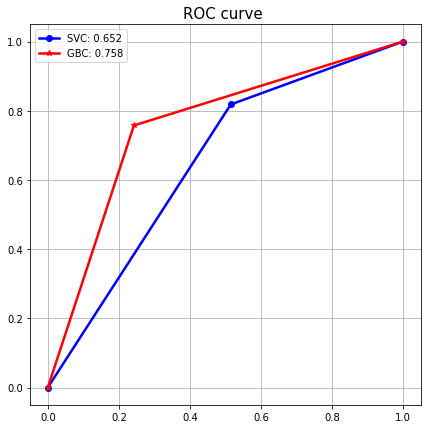

SVC Recall: 0.8181818181818182
GBC Recall: 0.7575757575757576


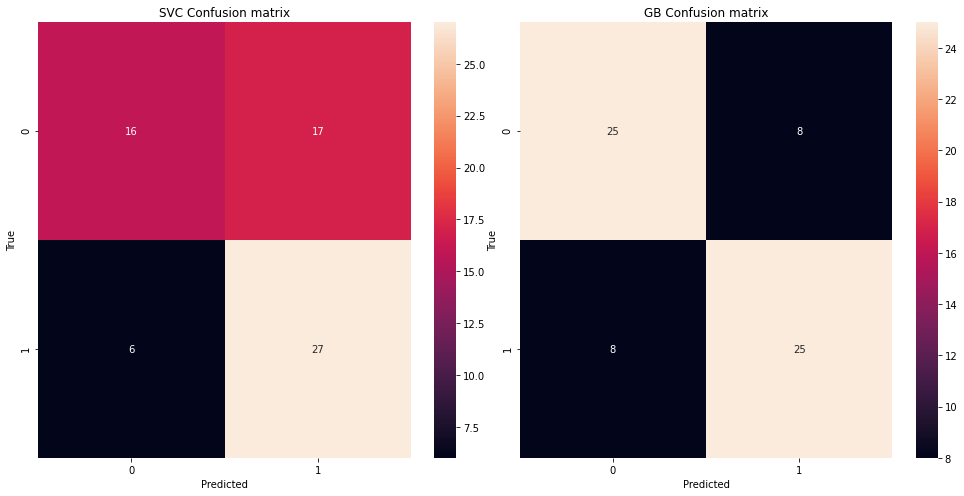

In [63]:
# as we can see we get the best precision score from Support Vector Classfier and Gradient Boosting Classifier

#therefore we will use them to evaluate further our test data


#selecting the best models
gbc= gbg.best_estimator_
svc = svg.best_estimator_

#taking their predictions
ypred_sv = svc.predict(xte)
ypred_gb= gbc.predict(xte)



print(f"SVC precision Score: {precision_score(yte,ypred_sv)}")
print(f"GBC precision Score: {precision_score(yte,ypred_gb)}")

fpr_sv,tpr_sv,thres_sv = roc_curve(yte,ypred_sv)
fpr_gb,tpr_gb,thres_gb = roc_curve(yte,ypred_gb)

auc_gb= round(roc_auc_score(yte,ypred_gb),3)
auc_sv= round(roc_auc_score(yte,ypred_sv),3)


plt.figure(figsize=(7,7))

plt.grid(True)
plt.plot(fpr_sv,tpr_sv,'-bo',label=f"SVC: {auc_sv}",linewidth =2.5)
plt.plot(fpr_gb,tpr_gb,'-r*',label=f"GBC: {auc_gb}",linewidth =2.5)
plt.legend(loc="upper left")
plt.title("ROC curve ",fontdict={'fontsize':15})
plt.show()


print(f"SVC Recall: {recall_score(yte,ypred_sv)}")
print(f"GBC Recall: {recall_score(yte,ypred_gb)}")


plt.figure(figsize = (14,7))

plt.subplot(1,2,1)
plt.tight_layout()
sns.heatmap(confusion_matrix(yte,ypred_sv,labels=gbc.classes_),annot=True)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("SVC Confusion matrix")

plt.subplot(1,2,2)
plt.tight_layout()
sns.heatmap(confusion_matrix(yte,ypred_gb,labels=gbc.classes_),annot=True)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("GB Confusion matrix")

plt.show()

In [64]:
print(f"SVC precision Score: {precision_score(yte,ypred_sv)}")
print(f"GBC precision Score: {precision_score(yte,ypred_gb)}")

SVC precision Score: 0.6136363636363636
GBC precision Score: 0.7575757575757576


In [65]:
fpr_sv,tpr_sv,thres_sv = roc_curve(yte,ypred_sv)
fpr_gb,tpr_gb,thres_gb = roc_curve(yte,ypred_gb)

auc_gb= round(roc_auc_score(yte,ypred_gb),3)
auc_sv= round(roc_auc_score(yte,ypred_sv),3)

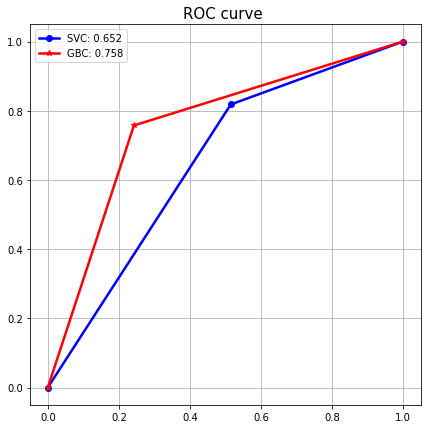

In [66]:
plt.figure(figsize=(7,7))

plt.grid(True)
plt.plot(fpr_sv,tpr_sv,'-bo',label=f"SVC: {auc_sv}",linewidth =2.5)
plt.plot(fpr_gb,tpr_gb,'-r*',label=f"GBC: {auc_gb}",linewidth =2.5)
plt.legend(loc="upper left")
plt.title("ROC curve ",fontdict={'fontsize':15})
plt.show()

In [67]:
print(f"SVC: {recall_score(yte,ypred_sv)}")
print(f"GBC: {recall_score(yte,ypred_gb)}")

SVC: 0.8181818181818182
GBC: 0.7575757575757576


Text(0.5, 1.0, 'GB Confusion matrix')

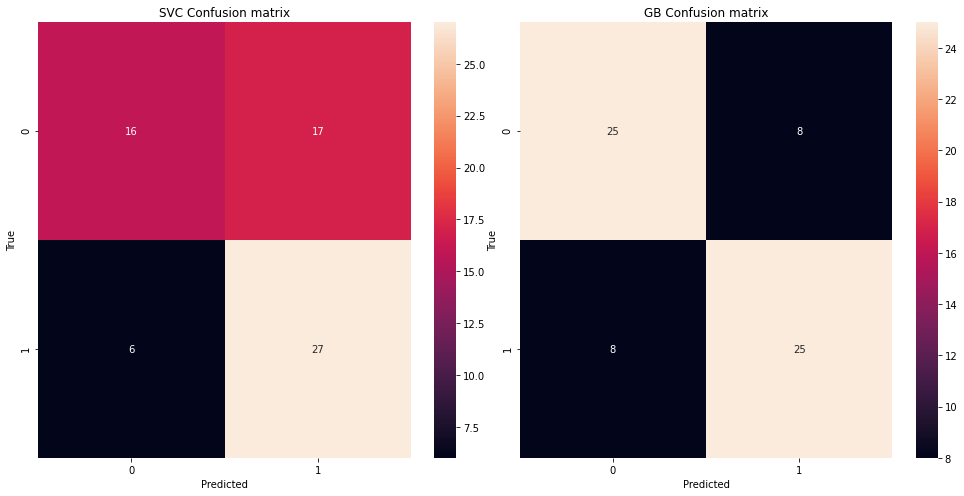

In [68]:
plt.figure(figsize = (14,7))

plt.subplot(1,2,1)
plt.tight_layout()
sns.heatmap(confusion_matrix(yte,ypred_sv,labels=gbc.classes_),annot=True)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("SVC Confusion matrix")

plt.subplot(1,2,2)
plt.tight_layout()
sns.heatmap(confusion_matrix(yte,ypred_gb,labels=gbc.classes_),annot=True)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("GB Confusion matrix")

In [99]:
# from the above evaluation we can see that the GBC gave better performance than the Support Vector Classifier

#the precision is  75% for Gradient Boost

#but since the training data size is small this is a adequate score ,
# with more training data the model can perform even better
